# REP-ASCA in Python
This notebook demonstrates how to run the REP-ASCA pipeline using the implementation provided in `librairies/repasca.py`.
Follow the cells in order: 
1. load data, 
2. compute repeatability components
3. inspect explained variance to choose how many components to remove
4. and apply the correction
5. plot results

## 1) Import required libraries
The code cell below imports NumPy, SciPy, Matplotlib, and the REP-ASCA functions from the local `librairies` package. Run it before any analysis.

In [4]:
import numpy as np
import os
from librairies.repasca import rep_asca, rep_asca_applied
import scipy.io as sio
import matplotlib.pyplot as plt


## 2) Analysis parameters
Set the main parameters for the analysis (for example `klimit` controls the maximum number of REP components to inspect). 
Adjust these values before running the computation cells.

In [5]:
klimit = 10 
mat_path =  './data/data.mat'

## 3) Load the example data file
This cell loads `data/data.mat` and prints the variables found inside. Make sure your `.mat` file contains the expected variables (`X`, `d`, `X_rep`, `d_rep`, ...). If a variable is missing, the notebook will show `None` for its shape.

In [6]:

print('repasca module loaded. Use rep_asca(X, design, X_rep, d_rep, klimit)')

if not os.path.exists(mat_path):
    raise FileNotFoundError(f"data.mat not found at {mat_path}. Please place your data.mat there.")

mat = sio.loadmat(mat_path)
print('Variables in data.mat:', sorted([k for k in mat.keys() if not k.startswith('__')]))

# Map expected variables with fallbacks
X = mat.get('X', None)
if X is not None:
    X = np.asarray(X, dtype=float)

d = mat.get('d', None)
X_rep = mat.get('X_rep', None)
d_rep = mat.get('d_rep', None)
lambda_ = mat.get('lambda', None)

print('X shape:', None if X is None else X.shape)
print('X_rep shape:', None if X_rep is None else np.asarray(X_rep).shape)
print('d shape:', None if d is None else np.asarray(d).shape)
print('d_rep shape:', None if d_rep is None else np.asarray(d_rep).shape)

repasca module loaded. Use rep_asca(X, design, X_rep, d_rep, klimit)
Variables in data.mat: ['X', 'X_rep', 'd', 'd_rep', 'klimit', 'lambda', 'palette']
X shape: (3000, 204)
X_rep shape: (300, 204)
d shape: (3000, 2)
d_rep shape: (300, 1)


## 4) Compute REP components
Run the REP-ASCA routine to estimate components associated with repeatability errors. The function returns explained variances and the corresponding error-related loadings. Inspect these outputs to guide the next step.

In [7]:
a, b = rep_asca(X, d, X_rep, d_rep, klimit=klimit)
print('Explained variances (cum) shape:', a.shape)
print('Loadings_error shape:', b.shape)

Explained variances (cum) shape: (11, 4)
Loadings_error shape: (204, 10)


## 5) Plot explained variance by factor
Visualize how much variance each factor explains as you remove an increasing number of REP components. Use these plots to choose a reasonable number of components to remove (trade-off between reducing repeatability noise and preserving signal).

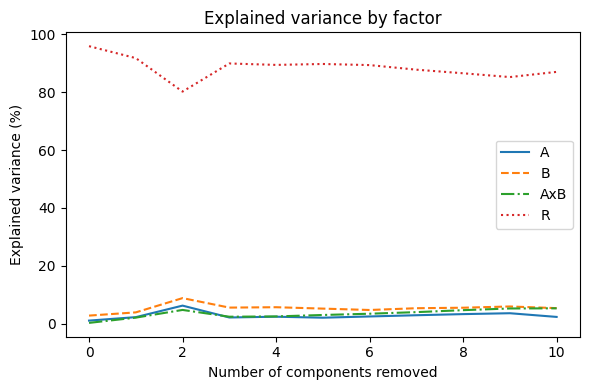

In [8]:



# Suppose 'a' is the explained_var matrix (not cumulative)
plt.figure(figsize=(6,4))
labels = ['A', 'B', 'AxB', 'R']
linestyles = ['-', '--', '-.', ':']

for i in range(a.shape[1]):
    plt.plot(range(a.shape[0]), a[:, i], linestyle=linestyles[i % len(linestyles)], label=labels[i])

plt.xlabel('Number of components removed')
plt.ylabel('Explained variance (%)')
plt.title('Explained variance by factor')
plt.legend()
plt.tight_layout()
plt.show()



## 6) Select the number of REP components to remove
After inspecting the plots, set `k` to the chosen number of components and run the `rep_asca_applied` call. The notebook uses `k=2` as an example; change this value if needed.

In [ ]:

model = rep_asca_applied(X, d, b, k=2,nperm=1000)

## 7) Visualize results
The following plots show the SCA scores and loadings after applying the REP correction. Use these figures to assess whether the correction improved the separation of factors of interest and reduced repeatability-related variation.

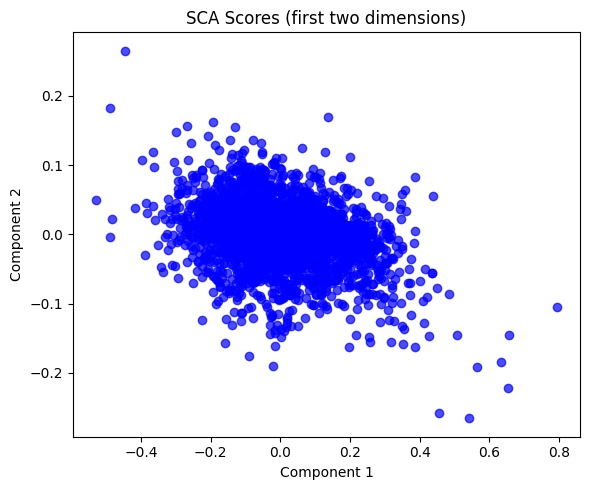

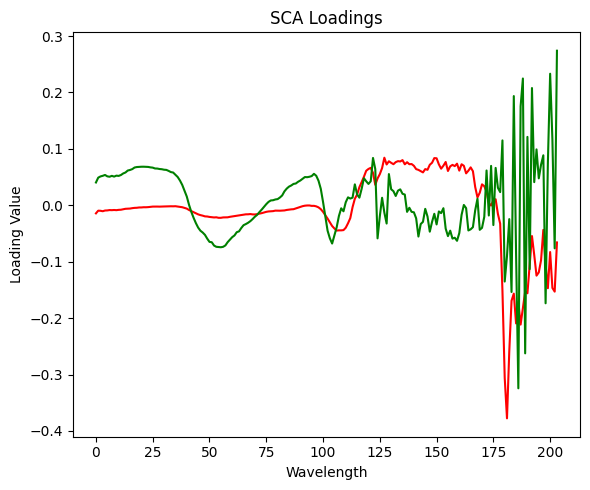

In [15]:

scores = model['XB']['SCA']['Model']['ScoreswithRes']
plt.figure(figsize=(6, 5))
plt.scatter(scores[:, 0], scores[:, 1], c='b', alpha=0.7)
plt.xlabel('Component 1')
plt.ylabel('Component 2')
plt.title('SCA Scores (first two dimensions)')
plt.tight_layout()
plt.show()

# plt.savefig('sca_scores_scatter.png')
# plt.close()
loadings = model['XB']['SCA']['Model']['Loadings']

plt.figure(figsize=(6, 5))
plt.plot( loadings[:, 0], label='Component 1', color='r')
plt.plot( loadings[:, 1], label='Component 2', color='g')
plt.xlabel('Wavelength')
plt.ylabel('Loading Value')
plt.title('SCA Loadings')
plt.tight_layout()
plt.show()

